In [1]:
import keras
import pandas as pd 
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from data_preprocess import get_data 
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

Using TensorFlow backend.


In [2]:
Xtrain, Ytrain, Xvalid, Yvalid = get_data()

In [3]:
model = keras.models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=Xtrain.shape[1:]))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7, name='Dense7'))
model.add(Activation('softmax', name='asd'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [4]:
y_integers = np.argmax(Yvalid, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

In [5]:
Ytrain

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
histroy = model.fit(Xtrain, Ytrain,
          batch_size=10,
          validation_data=(Xvalid, Yvalid),
          epochs=10, class_weight=d_class_weights)

Train on 32301 samples, validate on 7178 samples
Epoch 1/10
32301/32301 [==============================] - 33s 1ms/step - loss: 2.4763 - acc: 0.1656 - val_loss: 2.3028 - val_acc: 0.1037
Epoch 2/10
32301/32301 [==============================] - 32s 988us/step - loss: 1.7518 - acc: 0.3382 - val_loss: 1.7581 - val_acc: 0.3142
Epoch 3/10
32301/32301 [==============================] - 32s 991us/step - loss: 1.4336 - acc: 0.4290 - val_loss: 1.4912 - val_acc: 0.4278
Epoch 4/10
32301/32301 [==============================] - 33s 1ms/step - loss: 1.2976 - acc: 0.4694 - val_loss: 1.4720 - val_acc: 0.4418
Epoch 5/10
32301/32301 [==============================] - 32s 1ms/step - loss: 1.2120 - acc: 0.4927 - val_loss: 1.4122 - val_acc: 0.4560
Epoch 6/10
32301/32301 [==============================] - 34s 1ms/step - loss: 1.1638 - acc: 0.5186 - val_loss: 1.5141 - val_acc: 0.4253
Epoch 7/10
32301/32301 [==============================] - 34s 1ms/step - loss: 1.1129 - acc: 0.5345 - val_loss: 1.3568 - val_

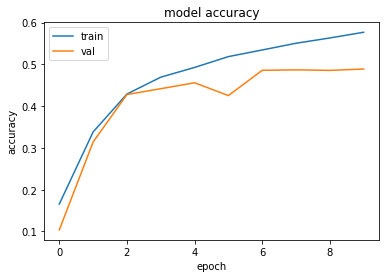

In [8]:
plt.plot(histroy.history['acc'])
plt.plot(histroy.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

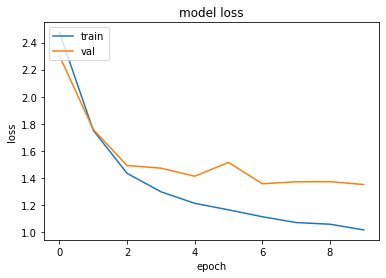

In [9]:
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
all_stuff = [np.argmax(Ytrain[i]) for i in range(0,len(Ytrain))]

In [ ]:
for i in list(set(all_stuff)):
    print(i, all_stuff.count(i))